In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
from os.path import dirname, join
from pathlib import Path
ROOT_DIR = dirname(os.path.abspath('ARCH7211-SPRING2021')) # This is your Project Root
data_PATH = join(ROOT_DIR,"data","room_info.csv")  # requires `import os`

# input data
data = pd.read_csv(r'C:\Users\milad\Documents\GitHub\arch7211-spring2021\data\room_info.csv')

In [3]:
# cMat = confusion_matrix(y_test,rfc_pred)
# print(len(y_test.unique()))
# df_cm = pd.DataFrame(data = cMat , index= pd.Series(y_test).unique() , columns= pd.Series(rfc_pred).unique())
# # df_cm = pd.DataFrame(data = cMat)
# df_cm.head()
# plt.figure(figsize= (50,50))
# sn.heatmap(df_cm, annot=True)

In [4]:
exclusion = ["Undefined","UserDefined","Other"]
merge = {
    "Sauna": "Bath",
    "Den":'LivingRoom',
    "Library": "Office",
    "DressingRoom":'Closet'
}

data["type_cleaned"] = data["type"].apply(lambda x: merge.get(x,x))
data["exclude"] = ~data["type"].isin(exclusion)

In [5]:
# data.groupby("type",as_index=False).count().sort_values("path")

In [6]:
data_exclude = data[~data["type"].isin(exclusion)]

In [7]:
data_exclude.groupby("type_cleaned",as_index=False).count().sort_values("type_cleaned")

,type_cleaned,path,type,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,...,contains_Sink,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap,exclude
0,Alcove,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1,Attic,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
2,Basement,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
3,Bath,7288,7288,7288,7288,7288,7288,7288,7288,7288,...,7288,7288,7288,7288,7288,7288,7288,7288,7288,7288
4,Bedroom,7993,7993,7993,7993,7993,7993,7993,7993,7993,...,7993,7993,7993,7993,7993,7993,7993,7993,7993,7993
5,CarPort,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
6,Closet,3041,3041,3041,3041,3041,3041,3041,3041,3041,...,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041
7,Dining,954,954,954,954,954,954,954,954,954,...,954,954,954,954,954,954,954,954,954,954
8,DraughtLobby,1667,1667,1667,1667,1667,1667,1667,1667,1667,...,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667
9,Elevated,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [8]:
#Clean input data from the target data
# define features and predictions
X = data_exclude.drop(['path','type','classes','open_to','door_to','contains','type_cleaned','exclude'], axis =1)
y = data_exclude['type']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [9]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(n_estimators= 400)

In [10]:
# train model 
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# predict
rfc_pred = rfc.predict(X_test)

In [29]:
# Evaluate model
print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))

[[  40    0    0    0    6    0    3    0    3    0    0    0    3    0
     0    0    0    0    0    1    0    0    0    2    0    0]
 [   0    6    0    0    9    0    4    0    0    0    0    0    1    1
     0    0    0    1    0    3    0    0    0    5    0    0]
 [   0    0    1    1    0    0    1    0    0    0    1    0    1    1
     0    0    0    0    0    2    0    1    0    7    0    0]
 [   0    0    1 2072    4    0   19    0    1    0    7    0    7    0
     0    0    0    0    0    2    0    0    0   10    4    9]
 [   3    0    0    1 2302    0    1    3    7    0    2    0   13   10
     0    1    0   24    0    8    0   12    0   10    0    0]
 [   0    0    0    0    0   35    0    0    0    0    0    0    0   10
     0    0    0    0    0   28    0    0    0    1    0    0]
 [   0    1    0    8   11    0  731    0    0    6    0    0    6    0
     0    0    0    0    0    6    0    0    0   19    3    0]
 [   0    0    0    0   14    0    0   38    4    0    

In [24]:
# sn.set()
# sn.barplot(y="type",x="area",data=data_exclude)

In [25]:
# sn.countplot(data_exclude["type_cleaned"])
# plt.xticks(rotation = 90)

In [31]:
#Grid Search
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, recall_score

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50,100, 150,200], 'min_impurity_split':[0.0,0.1], 'oob_score': [False,True]}   #,150,200,250,300,350,400,450,500,550,600,650,700,750,800
# scoring = {
    # 'Percision': make_scorer(average_precision_score),
    # 'f1': make_scorer(f1_score),
    # 'Accuracy': make_scorer(accuracy_score),
    # 'Recall': make_scorer(recall_score) }
rfc_grid = RandomForestClassifier()
grid_search = GridSearchCV(rfc_grid, param_grid, cv=5 , scoring='f1_macro' , return_train_score=True, refit='f1')
grid_search.fit(X_train, y_train)
cv_res = grid_search.cv_results_

 the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\milad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\milad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\milad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\milad\Anaconda3\l

In [32]:
# print (cv_res.keys())
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print ('f1_macro Score:',mean_score, params)

f1_macro Score: 0.5782658325328571 {'min_impurity_split': 0.0, 'n_estimators': 50, 'oob_score': False}
f1_macro Score: 0.5802022506823898 {'min_impurity_split': 0.0, 'n_estimators': 50, 'oob_score': True}
f1_macro Score: 0.5909632584327508 {'min_impurity_split': 0.0, 'n_estimators': 100, 'oob_score': False}
f1_macro Score: 0.5841378497429582 {'min_impurity_split': 0.0, 'n_estimators': 100, 'oob_score': True}
f1_macro Score: 0.5890318963202029 {'min_impurity_split': 0.0, 'n_estimators': 150, 'oob_score': False}
f1_macro Score: 0.5869321701660222 {'min_impurity_split': 0.0, 'n_estimators': 150, 'oob_score': True}
f1_macro Score: 0.5875821402322728 {'min_impurity_split': 0.0, 'n_estimators': 200, 'oob_score': False}
f1_macro Score: 0.5863318813546885 {'min_impurity_split': 0.0, 'n_estimators': 200, 'oob_score': True}
f1_macro Score: 0.5785121400351341 {'min_impurity_split': 0.1, 'n_estimators': 50, 'oob_score': False}
f1_macro Score: 0.5758565258635534 {'min_impurity_split': 0.1, 'n_estim

In [22]:
data_exclude.type.unique()

array(['Entry', 'Utility', 'Kitchen', 'LivingRoom', 'Bedroom', 'Bath',
       'Closet', 'DraughtLobby', 'Outdoor', 'Dining', 'Garage',
       'DressingRoom', 'TechnicalRoom', 'Room', 'Sauna', 'Storage',
       'Office', 'CarPort', 'Attic', 'Hall', 'Den', 'Alcove', 'Basement',
       'Elevated', 'Library', 'RecreationRoom'], dtype=object)

In [43]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(
                       bootstrap=True, class_weight="balanced", criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split= None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
# train model 
rfc.fit(X_train,y_train)
# predict
rfc_pred = rfc.predict(X_test)
# Evaluate model
# print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))



                precision    recall  f1-score   support

        Alcove       0.64      0.74      0.69        58
         Attic       0.41      0.50      0.45        30
      Basement       0.05      0.06      0.06        16
          Bath       0.97      0.95      0.96      2136
       Bedroom       0.82      0.92      0.87      2397
       CarPort       0.60      0.72      0.65        74
        Closet       0.89      0.91      0.90       791
           Den       0.62      0.55      0.58        86
        Dining       0.79      0.87      0.83       311
  DraughtLobby       0.87      0.95      0.91       498
  DressingRoom       0.53      0.51      0.52       110
      Elevated       0.54      0.22      0.31        32
         Entry       0.89      0.93      0.91      1296
        Garage       0.57      0.90      0.70       143
          Hall       1.00      0.19      0.32        48
       Kitchen       0.97      0.94      0.96      1322
       Library       0.00      0.00      0.00

In [95]:
#import random forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciate randomforest classifier 
rfc = RandomForestClassifier(n_estimators= 400 , max_depth= 25)
# train model 
rfc.fit(X_train,y_train)
# predict
rfc_pred = rfc.predict(X_test)
# Evaluate model
# print( confusion_matrix(y_test,rfc_pred))
print('\n')
print( classification_report(y_test,rfc_pred))



                precision    recall  f1-score   support

        Alcove       0.77      0.59      0.67        51
         Attic       0.80      0.18      0.30        22
      Basement       0.00      0.00      0.00        17
          Bath       0.96      0.97      0.97      2153
       Bedroom       0.80      0.96      0.87      2339
       CarPort       0.73      0.46      0.57        71
        Closet       0.88      0.95      0.91       804
           Den       0.76      0.39      0.52       104
        Dining       0.82      0.85      0.84       281
  DraughtLobby       0.93      0.93      0.93       491
  DressingRoom       0.75      0.40      0.52        94
      Elevated       1.00      0.03      0.06        32
         Entry       0.88      0.95      0.92      1296
        Garage       0.76      0.76      0.76       136
          Hall       1.00      0.04      0.07        54
       Kitchen       0.97      0.95      0.96      1373
       Library       0.00      0.00      0.00

In [48]:
print(rfc.feature_importances_)

[2.15779573e-02 1.97642523e-02 9.55179072e-02 7.89792481e-02
 8.73228959e-02 4.43770613e-02 3.41705740e-02 4.20285181e-02
 1.27859537e-02 4.55803113e-02 4.28946085e-02 5.69521578e-02
 4.19181486e-02 4.59693016e-02 2.70293193e-04 8.01212388e-06
 2.77065740e-04 9.88460593e-05 2.13930677e-06 4.25433389e-05
 1.36514789e-03 3.85773105e-02 1.57666399e-03 1.23445059e-02
 3.16355124e-05 3.30061727e-04 9.01286348e-05 3.09908330e-03
 5.59230219e-05 8.58684067e-04 8.32927218e-04 6.40405045e-04
 2.72263133e-05 1.94906257e-03 1.67048660e-04 9.63173973e-04
 8.28110859e-05 2.17360628e-04 7.02240463e-03 1.53220805e-02
 2.08397860e-05 5.30029716e-04 3.63024733e-05 1.21010322e-03
 1.66529693e-02 2.54230208e-03 8.52261947e-08 1.81821641e-06
 1.70220469e-02 9.60405126e-03 7.27865648e-07 1.74820625e-04
 2.41686947e-08 9.88256624e-08 2.27594907e-03 1.59032284e-02
 5.12314625e-06 1.60753876e-04 2.14847950e-03 3.81537989e-03
 6.39201478e-06 4.42247627e-05 3.69069327e-04 6.01281690e-03
 2.29600578e-05 7.561564

In [49]:
f_import = list(zip(X_train,rfc.feature_importances_))
for name,score in sorted(f_import, key = lambda x: x[1], reverse = True):
    print(name,score)

area 0.0955179072030424
perimeter 0.08732289585502744
proportion_floor_area 0.07897924811683532
num_doors 0.05695215778430777
num_fixtures 0.045969301572459854
num_adjacent_rooms 0.04558031129841582
compactness 0.04437706127866146
num_connected_rooms 0.0428946084752616
proportion_exterior_walls 0.04202851808830378
num_windows 0.04191814862482499
door_to_Bath 0.03857731047087445
num_adjacent_walls 0.03417057399387667
contains_BaseCabinet 0.026519398276790587
contains_Sink 0.022618791940853953
floor_index 0.02157795734740851
contains_Closet 0.020919513674859107
num_sides 0.01976425232405259
open_to_LivingRoom 0.01702204692569955
open_to_Kitchen 0.016652969270282775
door_to_Outdoor 0.015903228388483955
door_to_Entry 0.015322080453712196
contains_CoatCloset 0.014425480742387978
num_adjacent_railings 0.01278595374066089
door_to_Bedroom 0.012344505932607967
door_to_Undefined 0.011035928270337217
contains_Stove 0.009968323380516503
door_to_LivingRoom 0.009604051262883348
contains_Fireplace 0.

In [86]:
import seaborn as sns
import pandas as pd

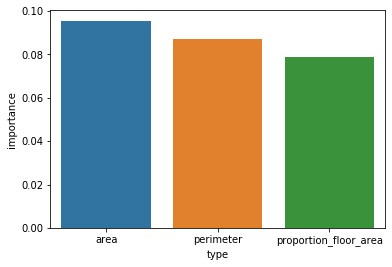

In [110]:
feat_imp = pd.DataFrame(data= {'type':[x[0] for x in f_import] , 'importance':[x[1] for x in f_import]}).sort_values('importance', ascending= False)
feat_imp
sns.barplot(x='type',y='importance',data= feat_imp.head(3), orient=270)
# sns.lineplot((x[0] for x in f_import) , (x[1] for x in f_import) )